### Titanic


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataframe = pd.read_csv('titanic.csv')
dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
missing_values = dataframe.isnull().mean()* 100
missing_values.sort_values(ascending=False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [6]:
data = dataframe.drop(['PassengerId','Ticket','Name'], axis=1)


In [7]:
men = data[data['Sex'] == 'male']
women = data[data['Sex'] == 'female']
print(men)
print(women)

     Survived  Pclass   Sex   Age  SibSp  Parch     Fare Cabin Embarked
0           0       3  male  22.0      1      0   7.2500   NaN        S
4           0       3  male  35.0      0      0   8.0500   NaN        S
5           0       3  male   NaN      0      0   8.4583   NaN        Q
6           0       1  male  54.0      0      0  51.8625   E46        S
7           0       3  male   2.0      3      1  21.0750   NaN        S
..        ...     ...   ...   ...    ...    ...      ...   ...      ...
883         0       2  male  28.0      0      0  10.5000   NaN        S
884         0       3  male  25.0      0      0   7.0500   NaN        S
886         0       2  male  27.0      0      0  13.0000   NaN        S
889         1       1  male  26.0      0      0  30.0000  C148        C
890         0       3  male  32.0      0      0   7.7500   NaN        Q

[577 rows x 9 columns]
     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Cabin Embarked
1           1       1  female  38.0   

Text(0, 0.5, 'Count')

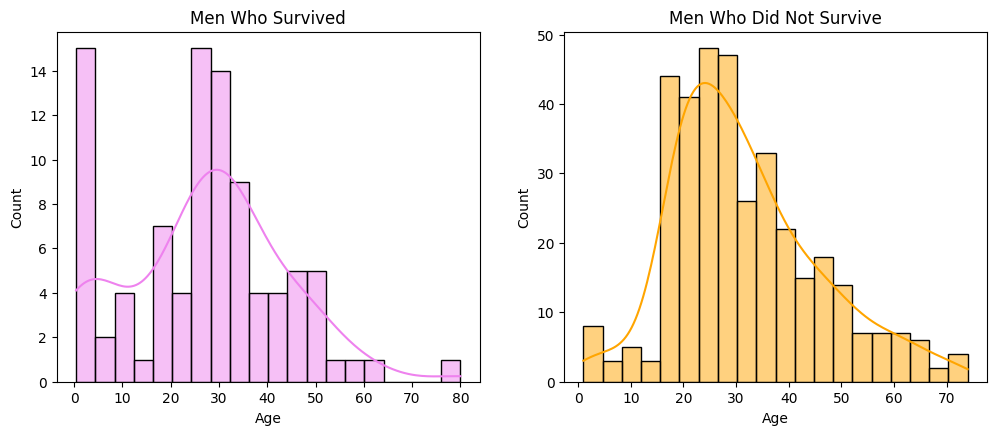

In [21]:
men_survived = men[men['Survived'] == 1]
men_not_survived = men[men['Survived'] == 0]
# Plot settings
plt.figure(figsize=(12, 10))

# Plot for men who survived
plt.subplot(2, 2, 1)
sns.histplot(men_survived['Age'], kde=True, bins=20, color='violet')
plt.title('Men Who Survived')
plt.xlabel('Age')
plt.ylabel('Count')

# Plot for men who did not survive
plt.subplot(2, 2, 2)
sns.histplot(men_not_survived['Age'], kde=True, bins=20, color='orange')
plt.title('Men Who Did Not Survive')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

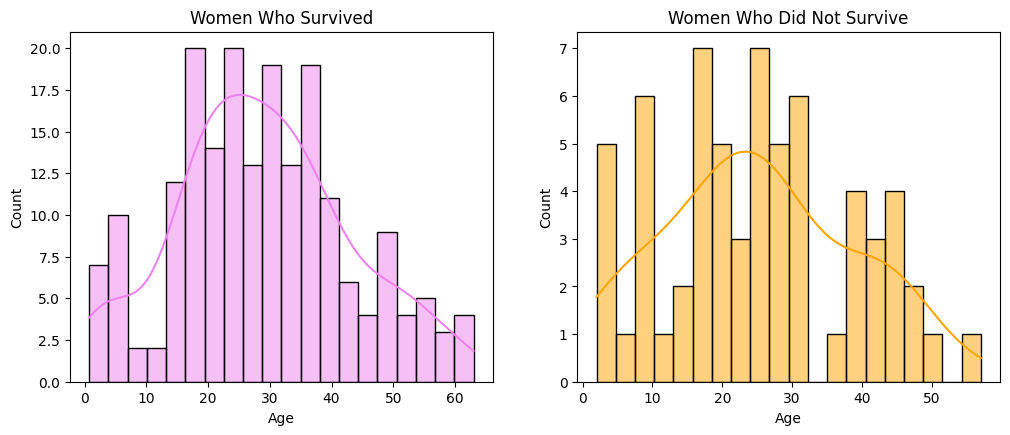

In [19]:
women_survived = women[women['Survived'] == 1]
women_not_survived = women[women['Survived'] == 0]
# Plot settings
plt.figure(figsize=(12, 10))

# Plot for men who survived
plt.subplot(2, 2, 1)
sns.histplot(women_survived['Age'], kde=True, bins=20, color='violet')
plt.title('Women Who Survived')
plt.xlabel('Age')
plt.ylabel('Count')

# Plot for men who did not survive
plt.subplot(2, 2, 2)
sns.histplot(women_not_survived['Age'], kde=True, bins=20, color='orange')
plt.title('Women Who Did Not Survive')
plt.xlabel('Age')
plt.ylabel('Count')